In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'mulliken_charges.csv', 'dipole_moments.csv', 'train.csv', 'structures.csv', 'magnetic_shielding_tensors.csv', 'potential_energy.csv', 'sample_submission.csv', 'scalar_coupling_contributions.csv', 'structures']


In [82]:
df_train = pd.read_csv("../input/train.csv") 

In [83]:
df_train.shape

(4658147, 6)

In [84]:
df_train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


**Molecule Name column exploration**

In [85]:
molecule_name_counts = df_train["molecule_name"].value_counts()
molecule_name_counts

dsgdb9nsd_042139    135
dsgdb9nsd_123246    133
dsgdb9nsd_096580    133
dsgdb9nsd_116493    132
dsgdb9nsd_121391    132
dsgdb9nsd_122665    132
dsgdb9nsd_123139    132
dsgdb9nsd_122958    131
dsgdb9nsd_095826    131
dsgdb9nsd_041896    131
dsgdb9nsd_041811    131
dsgdb9nsd_122006    131
dsgdb9nsd_101816    130
dsgdb9nsd_096544    130
dsgdb9nsd_122877    130
dsgdb9nsd_115379    130
dsgdb9nsd_121108    130
dsgdb9nsd_122135    130
dsgdb9nsd_121910    129
dsgdb9nsd_101671    129
dsgdb9nsd_116445    129
dsgdb9nsd_101473    129
dsgdb9nsd_060337    129
dsgdb9nsd_086461    129
dsgdb9nsd_115499    129
dsgdb9nsd_118466    128
dsgdb9nsd_095756    128
dsgdb9nsd_116289    128
dsgdb9nsd_117715    128
dsgdb9nsd_091753    128
                   ... 
dsgdb9nsd_130552      3
dsgdb9nsd_000790      3
dsgdb9nsd_008722      3
dsgdb9nsd_130668      3
dsgdb9nsd_008960      3
dsgdb9nsd_133436      3
dsgdb9nsd_130838      3
dsgdb9nsd_130817      3
dsgdb9nsd_023877      3
dsgdb9nsd_131996      3
dsgdb9nsd_000027

In [86]:
print("Max: " + molecule_name_counts.idxmax() + ": " + str(molecule_name_counts[molecule_name_counts.idxmax]))
print("Min: " + molecule_name_counts.idxmin() + ": " + str(molecule_name_counts[molecule_name_counts.idxmin]))

Max: dsgdb9nsd_042139: 135
Min: dsgdb9nsd_000003: 1


In [87]:
molecule_str = pd.DataFrame(molecule_name_counts.keys().str.split("_").tolist(), columns=["str", "digit"])

In [88]:
molecule_str.head()

,str,digit
0,dsgdb9nsd,042139
1,dsgdb9nsd,123246
2,dsgdb9nsd,096580
3,dsgdb9nsd,116493
4,dsgdb9nsd,121391


In [89]:
molecule_str["str"].value_counts()

dsgdb9nsd    85003
Name: str, dtype: int64

Seems like the string is actually the same every where, so we can easily consider it as useless for now. Of course, we should check if this is the case in the test set as well. 
Let us append the "digit" column to the main test_df

In [90]:
molecule_str_train = pd.DataFrame(df_train["molecule_name"].str.split("_").tolist(), columns=["str", "digit"])
df_train["molecule_digit"] = molecule_str_train["digit"]

In [91]:
df_train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,molecule_digit
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,000001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,000001
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,000001
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,000001
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,000001


**Scalar coupling constant**

In [92]:
print("Max: " + str(df_train["scalar_coupling_constant"].loc[df_train["scalar_coupling_constant"].idxmax()]))
print("Min: " + str(df_train["scalar_coupling_constant"].loc[df_train["scalar_coupling_constant"].idxmin()]))

Max: 204.88
Min: -36.2186


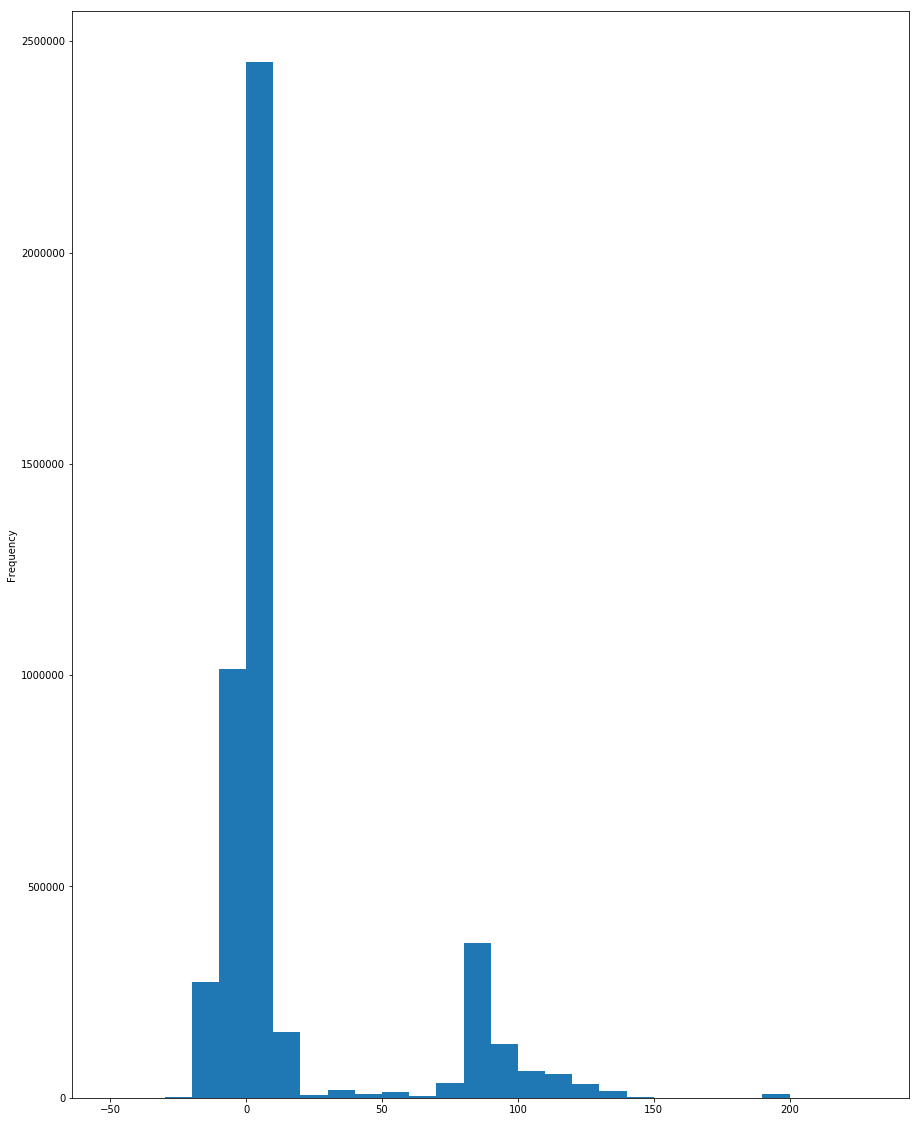

In [93]:
plt.figure(figsize=(15,20))
df_train["scalar_coupling_constant"].plot.hist(bins=range(-50, 240, 10))

Most values are around 0. It is interesting how there is almost no value between 20 & 70, then grouped around 70. Then no values between 150 & 190. Let us check this. 

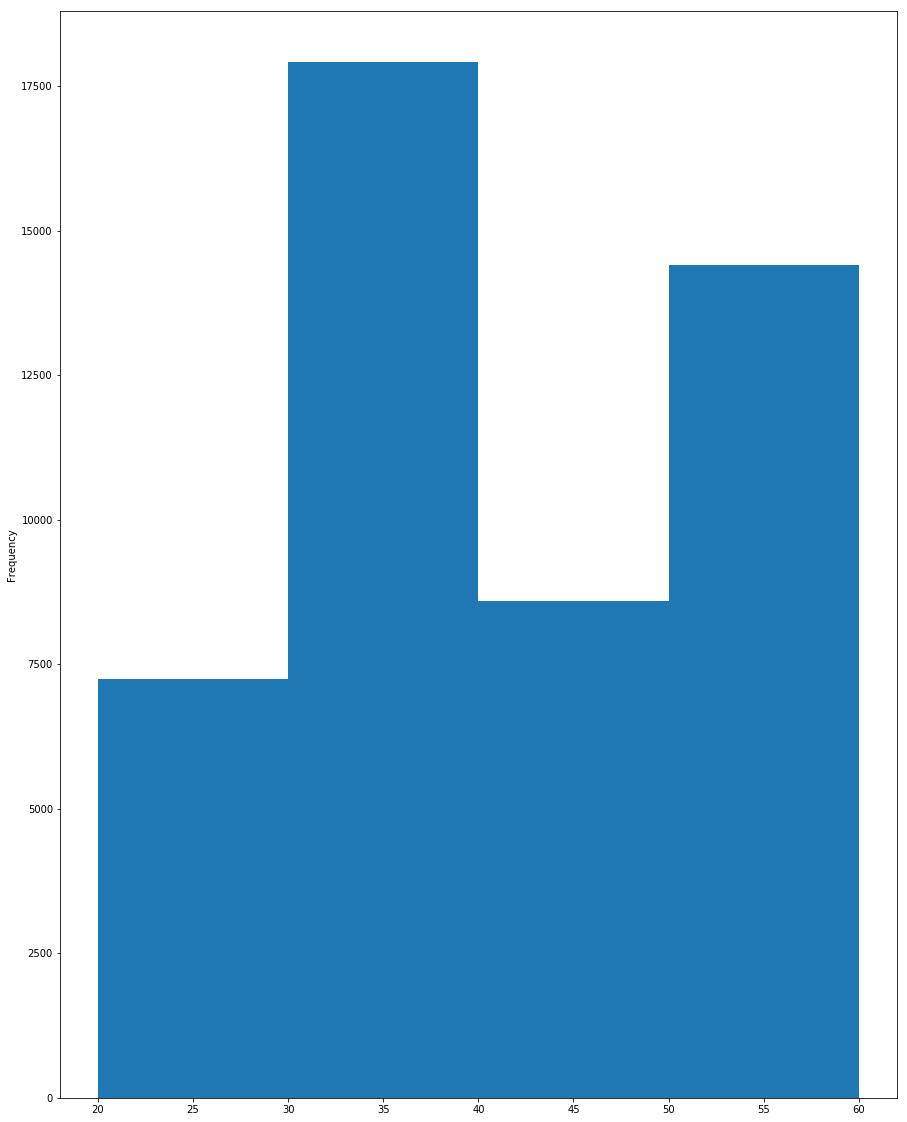

In [94]:
# Check values between 20 & 70. 
plt.figure(figsize=(15,20))
df_train.loc[ (df_train["scalar_coupling_constant"] > 20) & (df_train["scalar_coupling_constant"] < 70)]["scalar_coupling_constant"].plot.hist(bins=range(20, 70, 10))

Counts are much less than the global hist, but values are still represented. 

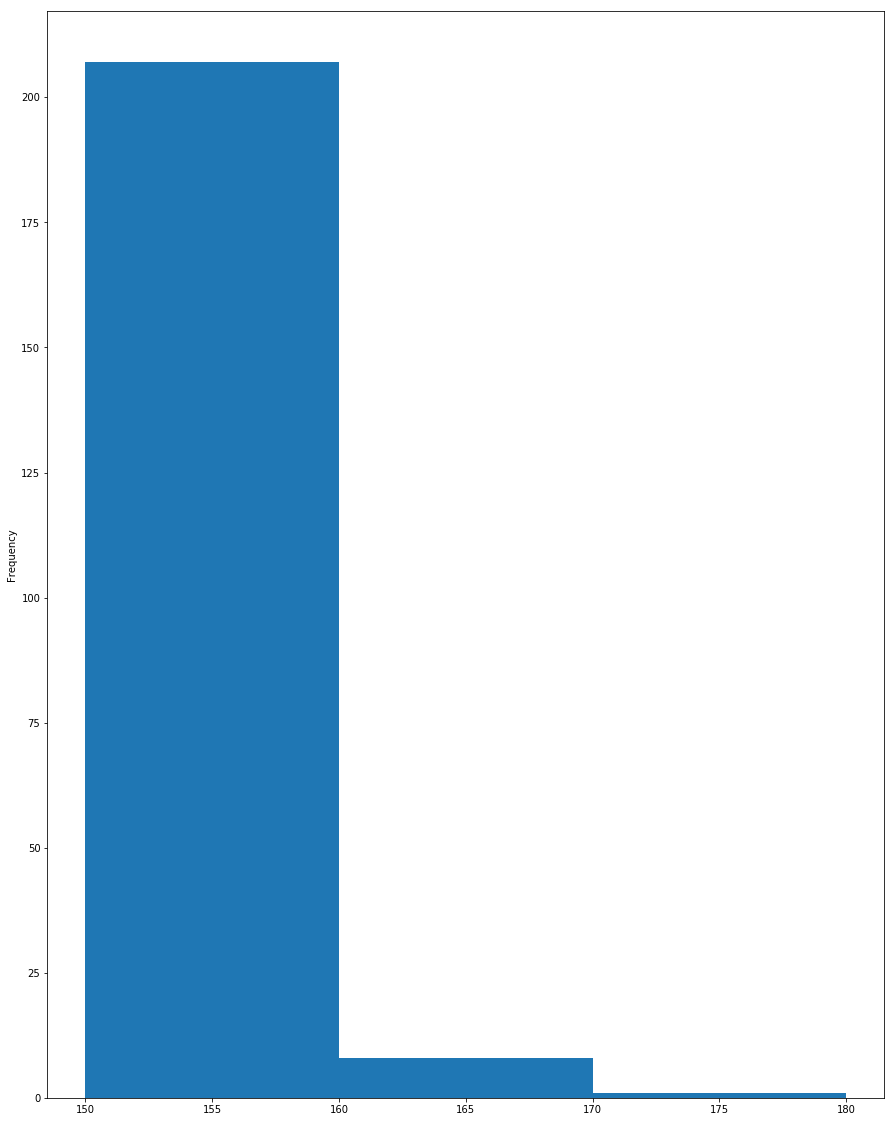

In [95]:
# Check values between 20 & 70. 
plt.figure(figsize=(15,20))
df_train.loc[ (df_train["scalar_coupling_constant"] > 150) & (df_train["scalar_coupling_constant"] < 190)]["scalar_coupling_constant"].plot.hist(bins=range(150, 190, 10))

The difference is much more visible here. Only 200 vals between 150 & 160, & less than 20 for higher vals. 

**Type column exploration**

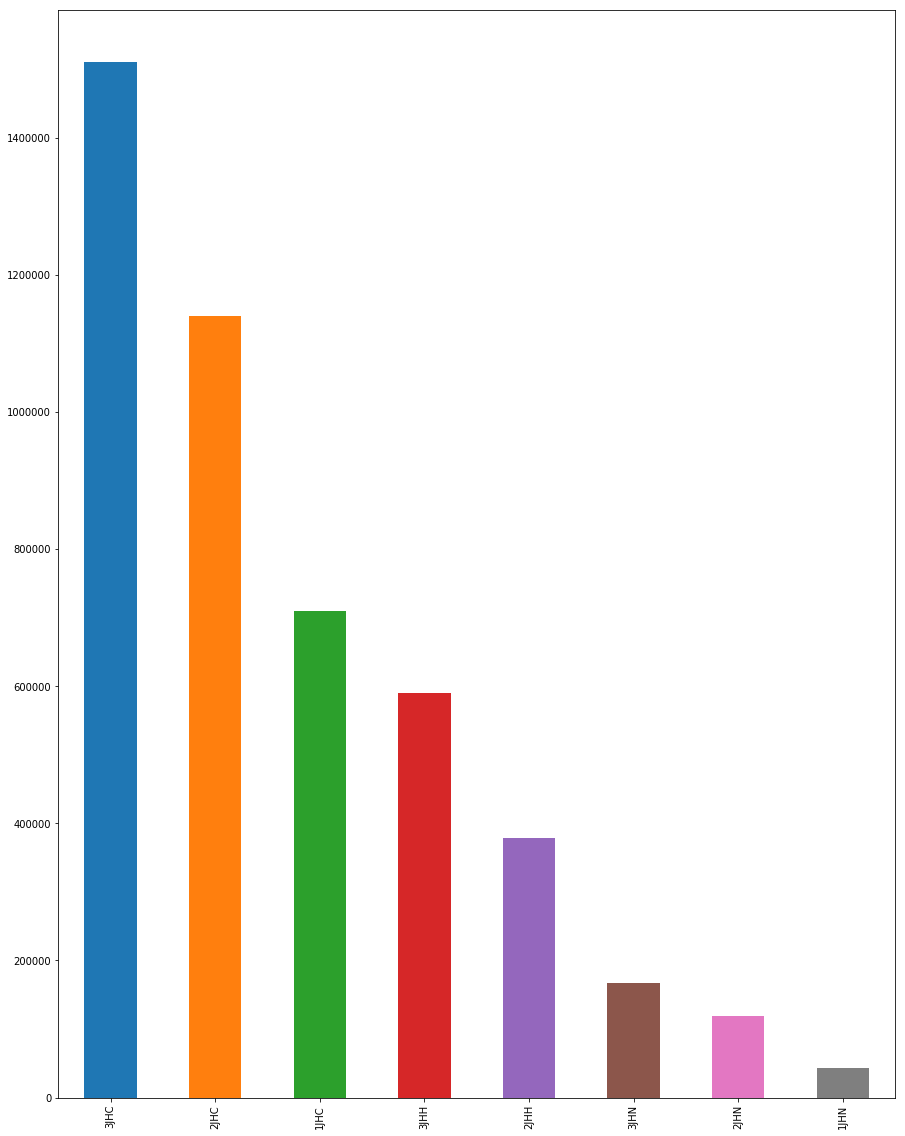

In [96]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,20))
df_train["type"].value_counts().plot.bar()

**Structure File**

In [99]:
struct_df = pd.read_csv("../input/structures.csv")

In [100]:
struct_df.shape

(2358657, 6)

In [101]:
display(struct_df.head())

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


To be continued...